In [1]:
### DM_CAPTURE_RATE.IPYNB -- Constrain the dark matter capture rate in neutron stars from inferred dark matter fractions and neutron star ages

In [2]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
import numpy.random

In [3]:
# load inferred DM fractions

j0030_dm = 0. # most likely DM fraction for this observation
j0030_dm_ub = 0.1 # upper bound on DM fraction (marginally ruled out at e.g. log(odds ratio) = 3 level)
j0030_dm_lb = 0. # lower bound on DM fraction
j0030_err = max(j0030_dm_ub-j0030_dm,j0030_dm-j0030_dm_lb) # take largest error bar as Gaussian 1-sigma uncertainty about most likely DM fraction 

j0740_dm = 0.
j0740_dm_ub = 0.2
j0740_dm_lb = 0.
j0740_err = max(j0740_dm_ub-j0740_dm,j0740_dm-j0740_dm_lb)

gw170817m1_dm = 0.1
gw170817m1_dm_ub = 0.2
gw170817m1_dm_lb = 0.
gw170817m1_err = max(gw170817m1_dm_ub-gw170817m1_dm,gw170817m1_dm-gw170817m1_dm_lb)

gw170817m2_dm = 0.1
gw170817m2_dm_ub = 0.3
gw170817m2_dm_lb = 0.
gw170817m2_err = max(gw170817m2_dm_ub-gw170817m2_dm,gw170817m2_dm-gw170817m2_dm_lb)

In [4]:
# load neutron star ages

j0030_age = 7.7 # in Gyr, from https://arxiv.org/abs/0904.4377

j0740_age = 3.8 # from https://arxiv.org/abs/1902.11150v1

gw170817_age = 0.4 # from https://arxiv.org/abs/1901.02732

age_fracerr = 0.5 # assume ages can be off by 50%, at the 1-sigma Gaussian uncertainty level

In [5]:
# linear fit for capture rate

wt_fit = np.polyfit([j0030_age,j0740_age,gw170817_age,gw170817_age],[j0030_dm,j0740_dm,gw170817m1_dm,gw170817m2_dm],1,w=[1./j0030_err,1./j0740_err,1./gw170817m1_err,1./gw170817m2_err])

In [6]:
# to illustrate uncertainty in fit, sample from Gaussian distributions for neutron star DM fractions and ages and re-fit

num_samps = 1000

j0030_dms, j0030_ages, j0740_dms, j0740_ages, gw170817m1_dms, gw170817m2_dms, gw170817_ages = [], [], [], [], [], [], []
for samp in range(num_samps):

  j0030_dm_samp = np.random.normal(j0030_dm,j0030_err) # sample DM fraction from Gaussian distribution
  j0030_age_samp = np.random.normal(j0030_age,j0030_age*age_fracerr) # sample age from Gaussian distribution

  j0740_dm_samp = np.random.normal(j0740_dm,j0740_err)
  j0740_age_samp = np.random.normal(j0740_age,j0740_age*age_fracerr)

  gw170817m1_dm_samp = np.random.normal(gw170817m1_dm,gw170817m1_err)
  gw170817m2_dm_samp = np.random.normal(gw170817m2_dm,gw170817m2_err)
  gw170817_age_samp = np.random.normal(gw170817_age,gw170817_age*age_fracerr)

  j0030_dms += [j0030_dm_samp]
  j0030_ages += [j0030_age_samp]
  j0740_dms += [j0740_dm_samp]
  j0740_ages += [j0740_age_samp]
  gw170817m1_dms += [gw170817m1_dm_samp]
  gw170817m2_dms += [gw170817m2_dm_samp]
  gw170817_ages += [gw170817_age_samp]

fits = []
for samp in range(num_samps):

  xs = [j0030_ages[samp],j0740_ages[samp],gw170817_ages[samp],gw170817_ages[samp]]
  ys = [j0030_dms[samp],j0740_dms[samp],gw170817m1_dms[samp],gw170817m2_dms[samp]]

  fit = np.polyfit(xs,ys,1)
  fits += [fit]

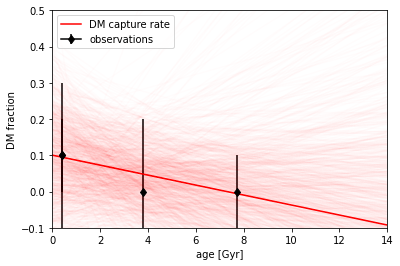

In [9]:
# plot inferred DM fractions and fit to capture rate

plt.errorbar(j0030_age,j0030_dm,yerr=j0030_err,marker='d',c='k',alpha=1) # DM fraction and age, with error bar in DM fraction (error in age not shown)
plt.errorbar(j0740_age,j0740_dm,yerr=j0740_err,marker='d',c='k',alpha=1)
plt.errorbar(gw170817_age,gw170817m1_dm,yerr=gw170817m1_err,marker='d',c='k',alpha=1)
plt.errorbar(gw170817_age,gw170817m2_dm,yerr=gw170817m2_err,marker='d',c='k',alpha=1,label='observations')

plt.plot(np.arange(0.,15.),wt_fit[0]*np.arange(0.,15.)+wt_fit[1],c='r',alpha=1,label='DM capture rate') # weighted linear fit for DM capture rate

for fit in fits:
  plt.plot(np.arange(0.,15.),fit[0]*np.arange(0.,15.)+fit[1],c='r',alpha=0.01) # range of possible fits, based on both DM fraction and age uncertainty

#plt.scatter(j0030_ages,j0030_dms,marker='.',c='k',alpha=0.1) # uncomment to see the data these possible fits are fitting
#plt.scatter(j0740_ages,j0740_dms,marker='.',c='k',alpha=0.1)
#plt.scatter(gw170817_ages,gw170817m1_dms,marker='.',c='k',alpha=0.1)
#plt.scatter(gw170817_ages,gw170817m2_dms,marker='.',c='k',alpha=0.1)

plt.ylim(-0.1,0.5)
plt.xlim(0.,14.)
plt.xlabel('age [Gyr]')
plt.ylabel('DM fraction')

plt.legend()
plt.show()